In [4]:
using PyPlot

F_m 0.3114477378834878
L_t 0.32
L_m 0.07500000000000001
L_mt 0.395

actual calc calcMuscleVelocity y 1.080014760829633 activation 0.01 F_m 0.3114477378834878 L_m 0.07500000000000001
calcfmdot V_m 0.0 V_mt 0.0 V_t 0.0 F_mdot 0.0

integral calc 

calcMuscleVelocity y 1.080014760829633 activation 0.01 F_m 0.3114477378834878 L_m 0.07500000000000001
calcfmdot V_m -0.0005890261547808515 V_mt 0.0 V_t 0.0005890261547808515 F_mdot 1.6991139080216868
calcMuscleVelocity y 1.1094750502744202 activation 0.01 F_m 0.3199433074235962 L_m 0.07500000000000001
calcfmdot V_m 0.002685482906757571 V_mt 0.0 V_t -0.002685482906757571 F_mdot -7.746585307954531
calcMuscleVelocity y 0.9456996661772723 activation 0.01 F_m 0.2727148113437151 L_m 0.07500000000000001
calcfmdot V_m -0.009029485169871105 V_mt 0.0 V_t 0.009029485169871105 F_mdot 26.046591836166648
calcMuscleVelocity y 1.9832386481994064 activation 0.01 F_m 0.5719136562451543 L_m 0.07500000000000001
calcfmdot V_m 0.4 V_mt 0.0 V_t -0.4 F_mdot -1153.8461538461538

Final Fm -1.6604412307330962 

actual calc calcMuscleVelocity y -5.757951722072672 activation 0.01 F_m -1.6604412307330962 L_m 0.07500000000000001
calcfmdot V_m -0.0005890261547808515 V_mt 0.0 V_t 0.0005890261547808515 F_mdot 1.6991139

calcMuscleVelocity y Inf activation 0.01 F_m 200.2748316292658 L_m 0.018740376463088737
calcfmdot V_m 0.4 V_mt 3.174258768513006 V_t 2.7742587685130062 F_mdot 8002.669524556748
calcMuscleVelocity y Inf activation 0.01 F_m 200.2748316292658 L_m 0.018740376463088737
calcfmdot V_m 0.4 V_mt 3.174258768513006 V_t 2.7742587685130062 F_mdot 8002.669524556748
calcMuscleVelocity y Inf activation 0.01 F_m 240.28817925204956 L_m 0.018740376463088737
calcfmdot V_m 0.4 V_mt 3.174258768513006 V_t 2.7742587685130062 F_mdot 8002.669524556748

Final Fm 240.28817925204953 

actual calc calcMuscleVelocity y Inf activation 0.01 F_m 240.28817925204953 L_m -0.03501040535039818
calcfmdot V_m 0.4 V_mt 1.5163967190013796 V_t 1.1163967190013797 F_mdot 3220.375150965518

integral calc calcMuscleVelocity y Inf activation 0.01 F_m 240.28817925204953 L_m -0.03501040535039818
calcfmdot V_m 0.4 V_mt 1.5163967190013796 V_t 1.1163967190013797 F_mdot 3220.375150965518
calcMuscleVelocity y Inf activation 0.01 F_m 256.390

calcfmdot V_m 0.4 V_mt 2.6278528926449596 V_t 2.2278528926449597 F_mdot 6426.4987287835365
calcMuscleVelocity y Inf activation 0.01 F_m 1527.7078935556335 L_m -0.839625232482526
calcfmdot V_m 0.4 V_mt 2.6278528926449596 V_t 2.2278528926449597 F_mdot 6426.4987287835365
calcMuscleVelocity y Inf activation 0.01 F_m 1527.7078935556335 L_m -0.839625232482526
calcfmdot V_m 0.4 V_mt 2.6278528926449596 V_t 2.2278528926449597 F_mdot 6426.4987287835365
calcMuscleVelocity y Inf activation 0.01 F_m 1559.840387199551 L_m -0.839625232482526
calcfmdot V_m 0.4 V_mt 2.6278528926449596 V_t 2.2278528926449597 F_mdot 6426.4987287835365

Final Fm 1559.840387199551 

actual calc calcMuscleVelocity y Inf activation 0.01 F_m 1559.840387199551 L_m -0.8841235414646471
calcfmdot V_m 0.4 V_mt 18.137615972083005 V_t 17.737615972083006 F_mdot 51166.19991947021

integral calc calcMuscleVelocity y Inf activation 0.01 F_m 1559.840387199551 L_m -0.8841235414646471
calcfmdot V_m 0.4 V_mt 18.137615972083005 V_t 17.737615

integral calc calcMuscleVelocity y Inf activation 0.01 F_m 8227.487156358233 L_m -4.8659136982223306
calcfmdot V_m 0.4 V_mt 106.36934190245948 V_t 105.96934190245948 F_mdot 305680.7939494023
calcMuscleVelocity y Inf activation 0.01 F_m 9755.891126105244 L_m -4.8659136982223306
calcfmdot V_m 0.4 V_mt 106.36934190245948 V_t 105.96934190245948 F_mdot 305680.7939494023
calcMuscleVelocity y Inf activation 0.01 F_m 9755.891126105244 L_m -4.8659136982223306
calcfmdot V_m 0.4 V_mt 106.36934190245948 V_t 105.96934190245948 F_mdot 305680.7939494023
calcMuscleVelocity y Inf activation 0.01 F_m 11284.295095852256 L_m -4.8659136982223306
calcfmdot V_m 0.4 V_mt 106.36934190245948 V_t 105.96934190245948 F_mdot 305680.7939494023

Final Fm 11284.295095852256 

actual calc calcMuscleVelocity y Inf activation 0.01 F_m 11284.295095852256 L_m -6.667101221103978
calcfmdot V_m 0.4 V_mt 13.218773894448384 V_t 12.818773894448384 F_mdot 36977.23238783187

integral calc calcMuscleVelocity y Inf activation 0.01 F

calcfmdot V_m 0.4 V_mt 75.6683449678732 V_t 75.26834496787319 F_mdot 217120.22586886495

integral calc calcMuscleVelocity y Inf activation 0.01 F_m 67418.67323732888 L_m -39.68696195410947
calcfmdot V_m 0.4 V_mt 75.6683449678732 V_t 75.26834496787319 F_mdot 217120.22586886495
calcMuscleVelocity y Inf activation 0.01 F_m 68504.27436667321 L_m -39.68696195410947
calcfmdot V_m 0.4 V_mt 75.6683449678732 V_t 75.26834496787319 F_mdot 217120.22586886495
calcMuscleVelocity y Inf activation 0.01 F_m 68504.27436667321 L_m -39.68696195410947
calcfmdot V_m 0.4 V_mt 75.6683449678732 V_t 75.26834496787319 F_mdot 217120.22586886495
calcMuscleVelocity y Inf activation 0.01 F_m 69589.87549601753 L_m -39.68696195410947
calcfmdot V_m 0.4 V_mt 75.6683449678732 V_t 75.26834496787319 F_mdot 217120.22586886495

Final Fm 69589.87549601753 

actual calc calcMuscleVelocity y Inf activation 0.01 F_m 69589.87549601753 L_m -40.968279262232116
calcfmdot V_m 0.4 V_mt 947.1179574039178 V_t 946.7179574039178 F_mdot 2.

calcMuscleVelocity y Inf activation 0.262939663370906 F_m 423121.9692715128 L_m -244.62302900011548
calcfmdot V_m 0.4 V_mt 465.44790280507425 V_t 465.0479028050743 F_mdot 1.341484335014637e6
calcMuscleVelocity y Inf activation 0.2864711005453673 F_m 429829.39094658603 L_m -244.62302900011548
calcfmdot V_m 0.4 V_mt 465.44790280507425 V_t 465.0479028050743 F_mdot 1.341484335014637e6

Final Fm 429829.39094658603 

actual calc calcMuscleVelocity y Inf activation 0.28647110054536734 F_m 429829.39094658603 L_m -252.50461348761473
calcfmdot V_m 0.4 V_mt 5904.608473073081 V_t 5904.208473073081 F_mdot 1.7031370595403116e7

integral calc calcMuscleVelocity y Inf activation 0.2864711005453673 F_m 429829.39094658603 L_m -252.50461348761473
calcfmdot V_m 0.4 V_mt 5904.608473073081 V_t 5904.208473073081 F_mdot 1.7031370595403116e7
calcMuscleVelocity y Inf activation 0.30575276016612074 F_m 514986.24392360164 L_m -252.50461348761473
calcfmdot V_m 0.4 V_mt 5904.608473073081 V_t 5904.208473073081 F_mdo

calcfmdot V_m 0.4 V_mt 2898.260508181261 V_t 2897.8605081812607 F_mdot 8.35921300436902e6
calcMuscleVelocity y Inf activation 0.4708649171206307 F_m 2.6769002067171177e6 L_m -1522.5756393133984
calcfmdot V_m 0.4 V_mt 2898.260508181261 V_t 2897.8605081812607 F_mdot 8.35921300436902e6

Final Fm 2.6769002067171177e6 

actual calc calcMuscleVelocity y Inf activation 0.4708649171206307 F_m 2.6769002067171177e6 L_m -1571.6528505852677
calcfmdot V_m 0.4 V_mt 36846.8299802107 V_t 36846.4299802107 F_mdot 1.0628777878906931e8

integral calc calcMuscleVelocity y Inf activation 0.4708649171206308 F_m 2.6769002067171177e6 L_m -1571.6528505852677
calcfmdot V_m 0.4 V_mt 36846.8299802107 V_t 36846.4299802107 F_mdot 1.0628777878906931e8
calcMuscleVelocity y Inf activation 0.47349581510463784 F_m 3.2083391006624643e6 L_m -1571.6528505852677
calcfmdot V_m 0.4 V_mt 36846.8299802107 V_t 36846.4299802107 F_mdot 1.0628777878906931e8
calcMuscleVelocity y Inf activation 0.47349581510463784 F_m 3.20833910066246

calcMuscleVelocity y Inf activation 0.49558655123690104 F_m 1.6439843355454879e7 L_m -9497.770626119185
calcfmdot V_m 0.4 V_mt 18082.68219955503 V_t 18082.28219955503 F_mdot 5.216042942179335e7
calcMuscleVelocity y Inf activation 0.4960246455793302 F_m 1.6700645502563845e7 L_m -9497.770626119185
calcfmdot V_m 0.4 V_mt 18082.68219955503 V_t 18082.28219955503 F_mdot 5.216042942179335e7

Final Fm 1.6700645502563845e7 

actual calc calcMuscleVelocity y Inf activation 0.49602464557933024 F_m 1.6700645502563845e7 L_m -9803.970711364984
calcfmdot V_m 0.4 V_mt 229972.98297448168 V_t 229972.5829744817 F_mdot 6.633824508879279e8

integral calc calcMuscleVelocity y Inf activation 0.4960246455793302 F_m 1.6700645502563845e7 L_m -9803.970711364984
calcfmdot V_m 0.4 V_mt 229972.98297448168 V_t 229972.5829744817 F_mdot 6.633824508879279e8
calcMuscleVelocity y Inf activation 0.4963836200835167 F_m 2.0017557757003486e7 L_m -9803.970711364984
calcfmdot V_m 0.4 V_mt 229972.98297448168 V_t 229972.58297448

calcMuscleVelocity y Inf activation 0.49939780425120367 F_m 1.0260087959442927e8 L_m -59273.86395966609
calcfmdot V_m 0.4 V_mt 112856.38634427256 V_t 112855.98634427256 F_mdot 3.2554611445463234e8
calcMuscleVelocity y Inf activation 0.4994575803049756 F_m 1.0422861016670243e8 L_m -59273.86395966609
calcfmdot V_m 0.4 V_mt 112856.38634427256 V_t 112855.98634427256 F_mdot 3.2554611445463234e8

Final Fm 1.0422861016670243e8 

actual calc calcMuscleVelocity y Inf activation 0.49945758030497556 F_m 1.0422861016670243e8 L_m -61184.8987684291
calcfmdot V_m 0.4 V_mt 1.4353715986415201e6 V_t 1.4353711986415202e6 F_mdot 4.140493842235154e9

integral calc calcMuscleVelocity y Inf activation 0.49945758030497556 F_m 1.0422861016670243e8 L_m -61184.8987684291
calcfmdot V_m 0.4 V_mt 1.4353715986415201e6 V_t 1.4353711986415202e6 F_mdot 4.140493842235154e9
calcMuscleVelocity y Inf activation 0.49950656080343625 F_m 1.249310793778782e8 L_m -61184.8987684291
calcfmdot V_m 0.4 V_mt 1.4353715986415201e6 V_t

calcMuscleVelocity y Inf activation 0.4999178330282431 F_m 6.403743925318562e8 L_m -369950.63915112294
calcfmdot V_m 0.4 V_mt 704387.3105949557 V_t 704386.9105949557 F_mdot 2.0318853190239103e9
calcMuscleVelocity y Inf activation 0.4999178330282431 F_m 6.403743925318562e8 L_m -369950.63915112294
calcfmdot V_m 0.4 V_mt 704387.3105949557 V_t 704386.9105949557 F_mdot 2.0318853190239103e9
calcMuscleVelocity y Inf activation 0.49992598920890663 F_m 6.505338191269757e8 L_m -369950.63915112294
calcfmdot V_m 0.4 V_mt 704387.3105949557 V_t 704386.9105949557 F_mdot 2.0318853190239103e9

Final Fm 6.505338191269757e8 

actual calc calcMuscleVelocity y Inf activation 0.49992598920890663 F_m 6.505338191269757e8 L_m -381878.26427719754
calcfmdot V_m 0.4 V_mt 8.95887786708107e6 V_t 8.95887746708107e6 F_mdot 2.584291577042616e10

integral calc calcMuscleVelocity y Inf activation 0.49992598920890663 F_m 6.505338191269757e8 L_m -381878.26427719754
calcfmdot V_m 0.4 V_mt 8.95887786708107e6 V_t 8.958877467

calcfmdot V_m 0.4 V_mt 4.396432878536077e6 V_t 4.396432478536077e6 F_mdot 1.2682016765007912e10

integral calc calcMuscleVelocity y Inf activation 0.49998767580154996 F_m 3.9334811445458593e9 L_m -2.309041359643092e6
calcfmdot V_m 0.4 V_mt 4.396432878536077e6 V_t 4.396432478536077e6 F_mdot 1.2682016765007912e10
calcMuscleVelocity y Inf activation 0.49998878867667 F_m 3.9968912283708987e9 L_m -2.309041359643092e6
calcfmdot V_m 0.4 V_mt 4.396432878536077e6 V_t 4.396432478536077e6 F_mdot 1.2682016765007912e10
calcMuscleVelocity y Inf activation 0.49998878867667 F_m 3.9968912283708987e9 L_m -2.309041359643092e6
calcfmdot V_m 0.4 V_mt 4.396432878536077e6 V_t 4.396432478536077e6 F_mdot 1.2682016765007912e10
calcMuscleVelocity y Inf activation 0.4999899015517901 F_m 4.0603013121959386e9 L_m -2.309041359643092e6
calcfmdot V_m 0.4 V_mt 4.396432878536077e6 V_t 4.396432478536077e6 F_mdot 1.2682016765007912e10

Final Fm 4.0603013121959386e9 

actual calc calcMuscleVelocity y Inf activation 0.49998

calcMuscleVelocity y Inf activation 0.49999831841711273 F_m 2.455084525121982e10 L_m -1.0314408093769819e7
calcfmdot V_m 0.4 V_mt 2.4197741503175434e8 V_t 2.4197741463175434e8 F_mdot 6.980117729762144e11

Final Fm 2.455084525121982e10 

actual calc calcMuscleVelocity y Inf activation 0.49999831841711273 F_m 2.455084525121982e10 L_m -1.441189232164086e7
calcfmdot V_m 0.4 V_mt 2.7440368397242706e7 V_t 2.7440367997242708e7 F_mdot 7.915490768435396e10

integral calc calcMuscleVelocity y Inf activation 0.4999983184171128 F_m 2.455084525121982e10 L_m -1.441189232164086e7
calcfmdot V_m 0.4 V_mt 2.7440368397242706e7 V_t 2.7440367997242708e7 F_mdot 7.915490768435396e10
calcMuscleVelocity y Inf activation 0.4999984702640475 F_m 2.4946619789641586e10 L_m -1.441189232164086e7
calcfmdot V_m 0.4 V_mt 2.7440368397242706e7 V_t 2.7440367997242708e7 F_mdot 7.915490768435396e10
calcMuscleVelocity y Inf activation 0.4999984702640475 F_m 2.4946619789641586e10 L_m -1.441189232164086e7
calcfmdot V_m 0.4 V_mt

calcfmdot V_m 0.4 V_mt 1.5103041988842514e9 V_t 1.5103041984842513e9 F_mdot 4.356646726396878e12
calcMuscleVelocity y Inf activation 0.49999974526999136 F_m 1.3145107319864275e11 L_m -6.437745953452586e7
calcfmdot V_m 0.4 V_mt 1.5103041988842514e9 V_t 1.5103041984842513e9 F_mdot 4.356646726396878e12
calcMuscleVelocity y Inf activation 0.49999974526999136 F_m 1.3145107319864275e11 L_m -6.437745953452586e7
calcfmdot V_m 0.4 V_mt 1.5103041988842514e9 V_t 1.5103041984842513e9 F_mdot 4.356646726396878e12
calcMuscleVelocity y Inf activation 0.4999997705553819 F_m 1.5323430683062714e11 L_m -6.437745953452586e7
calcfmdot V_m 0.4 V_mt 1.5103041988842514e9 V_t 1.5103041984842513e9 F_mdot 4.356646726396878e12

Final Fm 1.5323430683062714e11 

actual calc calcMuscleVelocity y Inf activation 0.4999997705553819 F_m 1.5323430683062714e11 L_m -8.995194396896584e7
calcfmdot V_m 0.4 V_mt 1.7126929857115585e8 V_t 1.7126929817115584e8 F_mdot 4.9404605241679565e11

integral calc calcMuscleVelocity y Inf ac

calcfmdot V_m 0.4 V_mt 7.411586738649138e8 V_t 7.411586734649138e8 F_mdot 2.1379577119180205e12

Final Fm 6.844927888599791e11 

actual calc calcMuscleVelocity y Inf activation 0.49999996179312545 F_m 6.844927888599791e11 L_m -4.0181247872520065e8
calcfmdot V_m 0.4 V_mt 9.426577193327314e9 V_t 9.426577192927315e9 F_mdot 2.7192049594982637e13

integral calc calcMuscleVelocity y Inf activation 0.49999996179312545 F_m 6.844927888599791e11 L_m -4.0181247872520065e8
calcfmdot V_m 0.4 V_mt 9.426577193327314e9 V_t 9.426577192927315e9 F_mdot 2.7192049594982637e13
calcMuscleVelocity y Inf activation 0.4999999652432062 F_m 8.204530368348923e11 L_m -4.0181247872520065e8
calcfmdot V_m 0.4 V_mt 9.426577193327314e9 V_t 9.426577192927315e9 F_mdot 2.7192049594982637e13
calcMuscleVelocity y Inf activation 0.4999999652432062 F_m 8.204530368348923e11 L_m -4.0181247872520065e8
calcfmdot V_m 0.4 V_mt 9.426577193327314e9 V_t 9.426577192927315e9 F_mdot 2.7192049594982637e13
calcMuscleVelocity y Inf activatio

calcfmdot V_m 0.4 V_mt 4.625948502026714e9 V_t 4.625948501626715e9 F_mdot 1.3344082216230906e13
calcMuscleVelocity y Inf activation 0.49999999421233565 F_m 4.2055474518545137e12 L_m -2.429583447642691e9
calcfmdot V_m 0.4 V_mt 4.625948502026714e9 V_t 4.625948501626715e9 F_mdot 1.3344082216230906e13
calcMuscleVelocity y Inf activation 0.49999999478683943 F_m 4.2722678629356685e12 L_m -2.429583447642691e9
calcfmdot V_m 0.4 V_mt 4.625948502026714e9 V_t 4.625948501626715e9 F_mdot 1.3344082216230906e13

Final Fm 4.2722678629356685e12 

actual calc calcMuscleVelocity y Inf activation 0.4999999947868394 F_m 4.2722678629356685e12 L_m -2.5079161756103435e9
calcfmdot V_m 0.4 V_mt 5.883606607299809e10 V_t 5.883606607259809e10 F_mdot 1.6971942136326372e14

integral calc calcMuscleVelocity y Inf activation 0.49999999478683943 F_m 4.2722678629356685e12 L_m -2.5079161756103435e9
calcfmdot V_m 0.4 V_mt 5.883606607299809e10 V_t 5.883606607259809e10 F_mdot 1.6971942136326372e14
calcMuscleVelocity y Inf a

calcfmdot V_m 0.4 V_mt 2.5460991155159424e11 V_t 2.5460991155119424e11 F_mdot 7.344516679361371e14
calcMuscleVelocity y Inf activation 0.49999999913191007 F_m 2.5832526069878152e13 L_m -1.0852872357721924e10
calcfmdot V_m 0.4 V_mt 2.5460991155159424e11 V_t 2.5460991155119424e11 F_mdot 7.344516679361371e14

Final Fm 2.5832526069878152e13 

actual calc calcMuscleVelocity y Inf activation 0.49999999913191 F_m 2.5832526069878152e13 L_m -1.5164266859995586e10
calcfmdot V_m 0.4 V_mt 2.88728990492296e10 V_t 2.8872899048829597e10 F_mdot 8.328720879470075e13

integral calc calcMuscleVelocity y Inf activation 0.49999999913191007 F_m 2.5832526069878152e13 L_m -1.5164266859995586e10
calcfmdot V_m 0.4 V_mt 2.88728990492296e10 V_t 2.8872899048829597e10 F_mdot 8.328720879470075e13
calcMuscleVelocity y Inf activation 0.4999999992102986 F_m 2.6248962113851656e13 L_m -1.5164266859995586e10
calcfmdot V_m 0.4 V_mt 2.88728990492296e10 V_t 2.8872899048829597e10 F_mdot 8.328720879470075e13
calcMuscleVelocity

calcfmdot V_m 0.4 V_mt 1.5891500460177583e12 V_t 1.5891500460173584e12 F_mdot 4.584086671203918e15

integral calc calcMuscleVelocity y Inf activation 0.49999999985544663 F_m 1.153930763730266e14 L_m -6.773830012245587e10
calcfmdot V_m 0.4 V_mt 1.5891500460177583e12 V_t 1.5891500460173584e12 F_mdot 4.584086671203918e15
calcMuscleVelocity y Inf activation 0.49999999986849974 F_m 1.3831350972904619e14 L_m -6.773830012245587e10
calcfmdot V_m 0.4 V_mt 1.5891500460177583e12 V_t 1.5891500460173584e12 F_mdot 4.584086671203918e15
calcMuscleVelocity y Inf activation 0.49999999986849974 F_m 1.3831350972904619e14 L_m -6.773830012245587e10
calcfmdot V_m 0.4 V_mt 1.5891500460177583e12 V_t 1.5891500460173584e12 F_mdot 4.584086671203918e15
calcMuscleVelocity y Inf activation 0.49999999988155297 F_m 1.6123394308506578e14 L_m -6.773830012245587e10
calcfmdot V_m 0.4 V_mt 1.5891500460177583e12 V_t 1.5891500460173584e12 F_mdot 4.584086671203918e15

Final Fm 1.6123394308506578e14 

actual calc calcMuscleVel

calcMuscleVelocity y Inf activation 0.49999999997810274 F_m 7.089790689714612e14 L_m -4.095837295513847e11
calcfmdot V_m 0.4 V_mt 7.798510660927798e11 V_t 7.798510660923798e11 F_mdot 2.2495703829587875e15
calcMuscleVelocity y Inf activation 0.49999999998027633 F_m 7.202269208862551e14 L_m -4.095837295513847e11
calcfmdot V_m 0.4 V_mt 7.798510660927798e11 V_t 7.798510660923798e11 F_mdot 2.2495703829587875e15

Final Fm 7.202269208862551e14 

actual calc calcMuscleVelocity y Inf activation 0.4999999999802763 F_m 7.202269208862551e14 L_m -4.227892076038891e11
calcfmdot V_m 0.4 V_mt 9.918694262048084e12 V_t 9.918694262047684e12 F_mdot 2.8611618063599084e16

integral calc calcMuscleVelocity y Inf activation 0.49999999998027633 F_m 7.202269208862551e14 L_m -4.227892076038891e11
calcfmdot V_m 0.4 V_mt 9.918694262048084e12 V_t 9.918694262047684e12 F_mdot 2.8611618063599084e16
calcMuscleVelocity y Inf activation 0.49999999998205735 F_m 8.632850112042505e14 L_m -4.227892076038891e11
calcfmdot V_m 

actual calc calcMuscleVelocity y Inf activation 0.4999999999967156 F_m 4.354895647761187e15 L_m -2.556420520695688e12
calcfmdot V_m 0.4 V_mt 4.867447421899749e12 V_t 4.867447421899349e12 F_mdot 1.404071371701735e16

integral calc calcMuscleVelocity y Inf activation 0.4999999999967157 F_m 4.354895647761187e15 L_m -2.556420520695688e12
calcfmdot V_m 0.4 V_mt 4.867447421899749e12 V_t 4.867447421899349e12 F_mdot 1.404071371701735e16
calcMuscleVelocity y Inf activation 0.4999999999970122 F_m 4.425099216346274e15 L_m -2.556420520695688e12
calcfmdot V_m 0.4 V_mt 4.867447421899749e12 V_t 4.867447421899349e12 F_mdot 1.404071371701735e16
calcMuscleVelocity y Inf activation 0.4999999999970122 F_m 4.425099216346274e15 L_m -2.556420520695688e12
calcfmdot V_m 0.4 V_mt 4.867447421899749e12 V_t 4.867447421899349e12 F_mdot 1.404071371701735e16
calcMuscleVelocity y Inf activation 0.49999999999730876 F_m 4.4953027849313605e15 L_m -2.556420520695688e12
calcfmdot V_m 0.4 V_mt 4.867447421899749e12 V_t 4.867

calcfmdot V_m 0.4 V_mt 2.6790189241659984e14 V_t 2.6790189241659944e14 F_mdot 7.727939204324983e17
calcMuscleVelocity y Inf activation 0.4999999999995025 F_m 2.3317150633464164e16 L_m -1.1419449558286982e13
calcfmdot V_m 0.4 V_mt 2.6790189241659984e14 V_t 2.6790189241659944e14 F_mdot 7.727939204324983e17
calcMuscleVelocity y Inf activation 0.4999999999995519 F_m 2.7181120235626656e16 L_m -1.1419449558286982e13
calcfmdot V_m 0.4 V_mt 2.6790189241659984e14 V_t 2.6790189241659944e14 F_mdot 7.727939204324983e17

Final Fm 2.7181120235626656e16 

actual calc calcMuscleVelocity y Inf activation 0.49999999999955186 F_m 2.7181120235626656e16 L_m -1.5955921603208074e13
calcfmdot V_m 0.4 V_mt 3.0380216729956715e13 V_t 3.0380216729956316e13 F_mdot 8.763524056718168e16

integral calc calcMuscleVelocity y Inf activation 0.4999999999995519 F_m 2.7181120235626656e16 L_m -1.5955921603208074e13
calcfmdot V_m 0.4 V_mt 3.0380216729956715e13 V_t 3.0380216729956316e13 F_mdot 8.763524056718168e16
calcMuscleV

calcfmdot V_m 0.4 V_mt 1.3146875396235998e14 V_t 1.3146875396235958e14 F_mdot 3.792367902760372e17

Final Fm 1.2141720384262122e17 

actual calc calcMuscleVelocity y Inf activation 0.4999999999999254 F_m 1.2141720384262122e17 L_m -7.127459681570522e13
calcfmdot V_m 0.4 V_mt 1.6721120637821e15 V_t 1.6721120637820995e15 F_mdot 4.823400183986825e18

integral calc calcMuscleVelocity y Inf activation 0.4999999999999254 F_m 1.2141720384262122e17 L_m -7.127459681570522e13
calcfmdot V_m 0.4 V_mt 1.6721120637821e15 V_t 1.6721120637820995e15 F_mdot 4.823400183986825e18
calcMuscleVelocity y Inf activation 0.49999999999993217 F_m 1.4553420476255533e17 L_m -7.127459681570522e13
calcfmdot V_m 0.4 V_mt 1.6721120637821e15 V_t 1.6721120637820995e15 F_mdot 4.823400183986825e18
calcMuscleVelocity y Inf activation 0.49999999999993217 F_m 1.4553420476255533e17 L_m -7.127459681570522e13
calcfmdot V_m 0.4 V_mt 1.6721120637821e15 V_t 1.6721120637820995e15 F_mdot 4.823400183986825e18
calcMuscleVelocity y Inf a

calcMuscleVelocity y Inf activation 0.11686678279679796 F_m 7.459915173906218e17 L_m -4.309661614539217e14
calcfmdot V_m 0.4 V_mt 8.20563406730309e14 V_t 8.205634067303086e14 F_mdot 2.3670098271066593e18
calcMuscleVelocity y Inf activation 0.11686678279679796 F_m 7.459915173906218e17 L_m -4.309661614539217e14
calcfmdot V_m 0.4 V_mt 8.20563406730309e14 V_t 8.205634067303086e14 F_mdot 2.3670098271066593e18
calcMuscleVelocity y Inf activation 0.10625881260162373 F_m 7.578265665261551e17 L_m -4.309661614539217e14
calcfmdot V_m 0.4 V_mt 8.20563406730309e14 V_t 8.205634067303086e14 F_mdot 2.3670098271066593e18

Final Fm 7.578265665261551e17 

actual calc calcMuscleVelocity y Inf activation 0.10625881260162243 F_m 7.578265665261551e17 L_m -4.448610351412216e14
calcfmdot V_m 0.4 V_mt 1.0436502439847634e16 V_t 1.0436502439847634e16 F_mdot 3.010529549956048e19

integral calc calcMuscleVelocity y Inf activation 0.1062588126016224 F_m 7.578265665261551e17 L_m -4.448610351412216e14
calcfmdot V_m 0.

calcMuscleVelocity y Inf activation 0.026028915399256114 F_m 4.5822441797612585e18 L_m -1.9251122036517102e15
calcfmdot V_m 0.4 V_mt 4.516340300294818e16 V_t 4.516340300294818e16 F_mdot 1.3027904712388895e20

Final Fm 4.5822441797612585e18 

actual calc calcMuscleVelocity y Inf activation 0.026028915399256048 F_m 4.5822441797612585e18 L_m -2.6898791611682995e15
calcfmdot V_m 0.4 V_mt 5.121553861061394e15 V_t 5.121553861061394e15 F_mdot 1.477371306075402e19

integral calc calcMuscleVelocity y Inf activation 0.026028915399256003 F_m 4.5822441797612585e18 L_m -2.6898791611682995e15
calcfmdot V_m 0.4 V_mt 5.121553861061394e15 V_t 5.121553861061394e15 F_mdot 1.477371306075402e19
calcMuscleVelocity y Inf activation 0.02458150433870321 F_m 4.656112745065029e18 L_m -2.6898791611682995e15
calcfmdot V_m 0.4 V_mt 5.121553861061394e15 V_t 5.121553861061394e15 F_mdot 1.477371306075402e19
calcMuscleVelocity y Inf activation 0.02458150433870321 F_m 4.656112745065029e18 L_m -2.6898791611682995e15
calc

integral calc calcMuscleVelocity y Inf activation 0.012669117994835694 F_m 2.0468739728452313e19 L_m -1.2015605081484364e16
calcfmdot V_m 0.4 V_mt 2.8188778482105034e17 V_t 2.8188778482105034e17 F_mdot 8.131378408299528e20
calcMuscleVelocity y Inf activation 0.012428096639902034 F_m 2.4534428932602077e19 L_m -1.2015605081484364e16
calcfmdot V_m 0.4 V_mt 2.8188778482105034e17 V_t 2.8188778482105034e17 F_mdot 8.131378408299528e20
calcMuscleVelocity y Inf activation 0.012428096639902034 F_m 2.4534428932602077e19 L_m -1.2015605081484364e16
calcfmdot V_m 0.4 V_mt 2.8188778482105034e17 V_t 2.8188778482105034e17 F_mdot 8.131378408299528e20
calcMuscleVelocity y Inf activation 0.012187075284968374 F_m 2.860011813675184e19 L_m -1.2015605081484364e16
calcfmdot V_m 0.4 V_mt 2.8188778482105034e17 V_t 2.8188778482105034e17 F_mdot 8.131378408299528e20

Final Fm 2.860011813675184e19 

actual calc calcMuscleVelocity y Inf activation 0.01218707528496837 F_m 2.860011813675184e19 L_m -1.6788904904454152e1

calcMuscleVelocity y Inf activation 0.010404324077664256 F_m 1.2576064779826764e20 L_m -7.265308301783003e16
calcfmdot V_m 0.4 V_mt 1.383321166317258e17 V_t 1.383321166317258e17 F_mdot 3.9903495182228586e20
calcMuscleVelocity y Inf activation 0.010364189457225562 F_m 1.2775582255737907e20 L_m -7.265308301783003e16
calcfmdot V_m 0.4 V_mt 1.383321166317258e17 V_t 1.383321166317258e17 F_mdot 3.9903495182228586e20

Final Fm 1.2775582255737907e20 

actual calc calcMuscleVelocity y Inf activation 0.01036418945722556 F_m 1.2775582255737907e20 L_m -7.499550685946058e16
calcfmdot V_m 0.4 V_mt 1.7594051366353357e18 V_t 1.7594051366353357e18 F_mdot 5.075207124909622e21

integral calc calcMuscleVelocity y Inf activation 0.01036418945722556 F_m 1.2775582255737907e20 L_m -7.499550685946058e16
calcfmdot V_m 0.4 V_mt 1.7594051366353357e18 V_t 1.7594051366353357e18 F_mdot 5.075207124909622e21
calcMuscleVelocity y Inf activation 0.010331303149238092 F_m 1.5313185818192717e20 L_m -7.499550685946058e16
ca


Final Fm 7.724833097731754e20 

actual calc calcMuscleVelocity y Inf activation 0.010060644442221918 F_m 7.724833097731754e20 L_m -4.534648691326268e17
calcfmdot V_m 0.4 V_mt 8.634011463746186e17 V_t 8.634011463746186e17 F_mdot 2.4905802299267843e21

integral calc calcMuscleVelocity y Inf activation 0.010060644442221918 F_m 7.724833097731754e20 L_m -4.534648691326268e17
calcfmdot V_m 0.4 V_mt 8.634011463746186e17 V_t 8.634011463746186e17 F_mdot 2.4905802299267843e21
calcMuscleVelocity y Inf activation 0.010055168249089278 F_m 7.849362109228093e20 L_m -4.534648691326268e17
calcfmdot V_m 0.4 V_mt 8.634011463746186e17 V_t 8.634011463746186e17 F_mdot 2.4905802299267843e21
calcMuscleVelocity y Inf activation 0.010055168249089278 F_m 7.849362109228093e20 L_m -4.534648691326268e17
calcfmdot V_m 0.4 V_mt 8.634011463746186e17 V_t 8.634011463746186e17 F_mdot 2.4905802299267843e21
calcMuscleVelocity y Inf activation 0.01004969205595664 F_m 7.973891120724433e20 L_m -4.534648691326268e17
calcfmdot

calcfmdot V_m 0.4 V_mt 4.75211709504619e19 V_t 4.75211709504619e19 F_mdot 1.3708030081864009e23
calcMuscleVelocity y Inf activation 0.010009186558336606 F_m 4.1360600006782427e21 L_m -2.025613218795344e18
calcfmdot V_m 0.4 V_mt 4.75211709504619e19 V_t 4.75211709504619e19 F_mdot 1.3708030081864009e23
calcMuscleVelocity y Inf activation 0.010009186558336606 F_m 4.1360600006782427e21 L_m -2.025613218795344e18
calcfmdot V_m 0.4 V_mt 4.75211709504619e19 V_t 4.75211709504619e19 F_mdot 1.3708030081864009e23
calcMuscleVelocity y Inf activation 0.010008274668463246 F_m 4.821461504771444e21 L_m -2.025613218795344e18
calcfmdot V_m 0.4 V_mt 4.75211709504619e19 V_t 4.75211709504619e19 F_mdot 1.3708030081864009e23

Final Fm 4.821461504771444e21 

actual calc calcMuscleVelocity y Inf activation 0.010008274668463246 F_m 4.821461504771444e21 L_m -2.8303050468898324e18
calcfmdot V_m 0.4 V_mt 5.388925997175394e18 V_t 5.388925997175394e18 F_mdot 1.5544978838005943e22

integral calc calcMuscleVelocity y In

calcfmdot V_m 0.4 V_mt 2.332028742064376e19 V_t 2.332028742064376e19 F_mdot 6.72700598672416e22
calcMuscleVelocity y Inf activation 0.01000137788901784 F_m 2.153731594833094e22 L_m -1.2247992868368437e19
calcfmdot V_m 0.4 V_mt 2.332028742064376e19 V_t 2.332028742064376e19 F_mdot 6.72700598672416e22

Final Fm 2.153731594833094e22 

actual calc calcMuscleVelocity y Inf activation 0.01000137788901784 F_m 2.153731594833094e22 L_m -1.2642883068691337e19
calcfmdot V_m 0.4 V_mt 2.9660381460745355e20 V_t 2.9660381460745355e20 F_mdot 8.555879267522698e23

integral calc calcMuscleVelocity y Inf activation 0.01000137788901784 F_m 2.153731594833094e22 L_m -1.2642883068691337e19
calcfmdot V_m 0.4 V_mt 2.9660381460745355e20 V_t 2.9660381460745355e20 F_mdot 8.555879267522698e23
calcMuscleVelocity y Inf activation 0.01000125346563953 F_m 2.581525558209229e22 L_m -1.2642883068691337e19
calcfmdot V_m 0.4 V_mt 2.9660381460745355e20 V_t 2.9660381460745355e20 F_mdot 8.555879267522698e23
calcMuscleVelocity 

calcfmdot V_m 0.4 V_mt 1.4555378304788845e20 V_t 1.4555378304788845e20 F_mdot 4.198666818689089e23

integral calc calcMuscleVelocity y Inf activation 0.010000229444618104 F_m 1.3022668379693608e23 L_m -7.64459573151081e19
calcfmdot V_m 0.4 V_mt 1.4555378304788845e20 V_t 1.4555378304788845e20 F_mdot 4.198666818689089e23
calcMuscleVelocity y Inf activation 0.010000208725769089 F_m 1.3232601720628062e23 L_m -7.64459573151081e19
calcfmdot V_m 0.4 V_mt 1.4555378304788845e20 V_t 1.4555378304788845e20 F_mdot 4.198666818689089e23
calcMuscleVelocity y Inf activation 0.010000208725769089 F_m 1.3232601720628062e23 L_m -7.64459573151081e19
calcfmdot V_m 0.4 V_mt 1.4555378304788845e20 V_t 1.4555378304788845e20 F_mdot 4.198666818689089e23
calcMuscleVelocity y Inf activation 0.010000188006920074 F_m 1.3442535061562517e23 L_m -7.64459573151081e19
calcfmdot V_m 0.4 V_mt 1.4555378304788845e20 V_t 1.4555378304788845e20 F_mdot 4.198666818689089e23

Final Fm 1.3442535061562517e23 

actual calc calcMuscleVe

calcfmdot V_m 0.4 V_mt 8.011208041301353e21 V_t 8.011208041301353e21 F_mdot 2.3109253965292364e25
calcMuscleVelocity y Inf activation 0.010000034756793732 F_m 6.972647448287751e23 L_m -3.4148167190358026e20
calcfmdot V_m 0.4 V_mt 8.011208041301353e21 V_t 8.011208041301353e21 F_mdot 2.3109253965292364e25
calcMuscleVelocity y Inf activation 0.010000031306712964 F_m 8.128110146552369e23 L_m -3.4148167190358026e20
calcfmdot V_m 0.4 V_mt 8.011208041301353e21 V_t 8.011208041301353e21 F_mdot 2.3109253965292364e25

Final Fm 8.128110146552369e23 

actual calc calcMuscleVelocity y Inf activation 0.010000031306712964 F_m 8.128110146552369e23 L_m -4.771381280696165e20
calcfmdot V_m 0.4 V_mt 9.084752420674473e20 V_t 9.084752420674473e20 F_mdot 2.6206016598099436e24

integral calc calcMuscleVelocity y Inf activation 0.010000031306712964 F_m 8.128110146552369e23 L_m -4.771381280696165e20
calcfmdot V_m 0.4 V_mt 9.084752420674473e20 V_t 9.084752420674473e20 F_mdot 2.6206016598099436e24
calcMuscleVeloci

calcfmdot V_m 0.4 V_mt 3.931377749602867e21 V_t 3.931377749602867e21 F_mdot 1.1340512739239038e25

Final Fm 3.630801077969643e24 

actual calc calcMuscleVelocity y Inf activation 0.010000005213160645 F_m 3.630801077969643e24 L_m -2.1313609172365798e21
calcfmdot V_m 0.4 V_mt 5.0002026825914985e22 V_t 5.0002026825914985e22 F_mdot 1.4423661584398553e26

integral calc calcMuscleVelocity y Inf activation 0.010000005213160645 F_m 3.630801077969643e24 L_m -2.1313609172365798e21
calcfmdot V_m 0.4 V_mt 5.0002026825914985e22 V_t 5.0002026825914985e22 F_mdot 1.4423661584398553e26
calcMuscleVelocity y Inf activation 0.01000000474241224 F_m 4.3519841571895703e24 L_m -2.1313609172365798e21
calcfmdot V_m 0.4 V_mt 5.0002026825914985e22 V_t 5.0002026825914985e22 F_mdot 1.4423661584398553e26
calcMuscleVelocity y Inf activation 0.01000000474241224 F_m 4.3519841571895703e24 L_m -2.1313609172365798e21
calcfmdot V_m 0.4 V_mt 5.0002026825914985e22 V_t 5.0002026825914985e22 F_mdot 1.4423661584398553e26
calcMu

integral calc calcMuscleVelocity y Inf activation 0.010000000868089984 F_m 2.195385836585499e25 L_m -1.2887402724276123e22
calcfmdot V_m 0.4 V_mt 2.4537729476629046e22 V_t 2.4537729476629046e22 F_mdot 7.0781911951814545e25
calcMuscleVelocity y Inf activation 0.010000000789701459 F_m 2.2307767925614066e25 L_m -1.2887402724276123e22
calcfmdot V_m 0.4 V_mt 2.4537729476629046e22 V_t 2.4537729476629046e22 F_mdot 7.0781911951814545e25
calcMuscleVelocity y Inf activation 0.010000000789701459 F_m 2.2307767925614066e25 L_m -1.2887402724276123e22
calcfmdot V_m 0.4 V_mt 2.4537729476629046e22 V_t 2.4537729476629046e22 F_mdot 7.0781911951814545e25
calcMuscleVelocity y Inf activation 0.010000000711312932 F_m 2.2661677485373136e25 L_m -1.2887402724276123e22
calcfmdot V_m 0.4 V_mt 2.4537729476629046e22 V_t 2.4537729476629046e22 F_mdot 7.0781911951814545e25

Final Fm 2.2661677485373136e25 

actual calc calcMuscleVelocity y Inf activation 0.010000000711312932 F_m 2.2661677485373136e25 L_m -1.33029082767

calcMuscleVelocity y Inf activation 0.01000000013150025 F_m 1.1754619717833203e26 L_m -5.756762009847743e22
calcfmdot V_m 0.4 V_mt 1.3505444625494363e24 V_t 1.3505444625494363e24 F_mdot 3.89580133427722e27
calcMuscleVelocity y Inf activation 0.010000000118447075 F_m 1.3702520384971812e26 L_m -5.756762009847743e22
calcfmdot V_m 0.4 V_mt 1.3505444625494363e24 V_t 1.3505444625494363e24 F_mdot 3.89580133427722e27

Final Fm 1.3702520384971812e26 

actual calc calcMuscleVelocity y Inf activation 0.010000000118447075 F_m 1.3702520384971812e26 L_m -8.043683966431454e22
calcfmdot V_m 0.4 V_mt 1.5315245855706736e23 V_t 1.5315245855706736e23 F_mdot 4.417859381453866e26

integral calc calcMuscleVelocity y Inf activation 0.010000000118447075 F_m 1.3702520384971812e26 L_m -8.043683966431454e22
calcfmdot V_m 0.4 V_mt 1.5315245855706736e23 V_t 1.5315245855706736e23 F_mdot 4.417859381453866e26
calcMuscleVelocity y Inf activation 0.010000000107751305 F_m 1.3923413354044506e26 L_m -8.043683966431454e22
c

actual calc calcMuscleVelocity y Inf activation 0.010000000019723681 F_m 6.1208724891307185e26 L_m -3.59308817050838e23
calcfmdot V_m 0.4 V_mt 8.429435373272142e24 V_t 8.429435373272142e24 F_mdot 2.4315678961361945e28

integral calc calcMuscleVelocity y Inf activation 0.010000000019723681 F_m 6.1208724891307185e26 L_m -3.59308817050838e23
calcfmdot V_m 0.4 V_mt 8.429435373272142e24 V_t 8.429435373272142e24 F_mdot 2.4315678961361945e28
calcMuscleVelocity y Inf activation 0.010000000017942634 F_m 7.336656437198816e26 L_m -3.59308817050838e23
calcfmdot V_m 0.4 V_mt 8.429435373272142e24 V_t 8.429435373272142e24 F_mdot 2.4315678961361945e28
calcMuscleVelocity y Inf activation 0.010000000017942634 F_m 7.336656437198816e26 L_m -3.59308817050838e23
calcfmdot V_m 0.4 V_mt 8.429435373272142e24 V_t 8.429435373272142e24 F_mdot 2.4315678961361945e28
calcMuscleVelocity y Inf activation 0.010000000016161584 F_m 8.552440385266913e26 L_m -3.59308817050838e23
calcfmdot V_m 0.4 V_mt 8.429435373272142e24 

calcfmdot V_m 0.4 V_mt 7.58832641374555e25 V_t 7.58832641374555e25 F_mdot 2.18894031165737e29
calcMuscleVelocity y Inf activation 0.010000000001480592 F_m 7.699057695285786e27 L_m -3.2345613512428503e24
calcfmdot V_m 0.4 V_mt 7.58832641374555e25 V_t 7.58832641374555e25 F_mdot 2.18894031165737e29

Final Fm 7.699057695285786e27 

actual calc calcMuscleVelocity y Inf activation 0.010000000001480592 F_m 7.699057695285786e27 L_m -4.5195179573037637e24
calcfmdot V_m 0.4 V_mt 8.605202411513523e24 V_t 8.605202411513523e24 F_mdot 2.4822699263981316e28

integral calc calcMuscleVelocity y Inf activation 0.010000000001480592 F_m 7.699057695285786e27 L_m -4.5195179573037637e24
calcfmdot V_m 0.4 V_mt 8.605202411513523e24 V_t 8.605202411513523e24 F_mdot 2.4822699263981316e28
calcMuscleVelocity y Inf activation 0.010000000001346895 F_m 7.823171191605693e27 L_m -4.5195179573037637e24
calcfmdot V_m 0.4 V_mt 8.605202411513523e24 V_t 8.605202411513523e24 F_mdot 2.4822699263981316e28
calcMuscleVelocity y I

calcfmdot V_m 0.4 V_mt 4.73626073555654e26 V_t 4.73626073555654e26 F_mdot 1.366229058333617e30

integral calc calcMuscleVelocity y Inf activation 0.010000000000246548 F_m 3.4391447058884904e28 L_m -2.018854367794453e25
calcfmdot V_m 0.4 V_mt 4.73626073555654e26 V_t 4.73626073555654e26 F_mdot 1.366229058333617e30
calcMuscleVelocity y Inf activation 0.010000000000224284 F_m 4.122259235055299e28 L_m -2.018854367794453e25
calcfmdot V_m 0.4 V_mt 4.73626073555654e26 V_t 4.73626073555654e26 F_mdot 1.366229058333617e30
calcMuscleVelocity y Inf activation 0.010000000000224284 F_m 4.122259235055299e28 L_m -2.018854367794453e25
calcfmdot V_m 0.4 V_mt 4.73626073555654e26 V_t 4.73626073555654e26 F_mdot 1.366229058333617e30
calcMuscleVelocity y Inf activation 0.010000000000202021 F_m 4.8053737642221075e28 L_m -2.018854367794453e25
calcfmdot V_m 0.4 V_mt 4.73626073555654e26 V_t 4.73626073555654e26 F_mdot 1.366229058333617e30

Final Fm 4.8053737642221075e28 

actual calc calcMuscleVelocity y Inf activ

calcfmdot V_m 0.4 V_mt 2.3242474762969734e26 V_t 2.3242474762969734e26 F_mdot 6.70456002777973e29
calcMuscleVelocity y Inf activation 0.010000000000037349 F_m 2.1130224519065795e29 L_m -1.2207125066910017e26
calcfmdot V_m 0.4 V_mt 2.3242474762969734e26 V_t 2.3242474762969734e26 F_mdot 6.70456002777973e29
calcMuscleVelocity y Inf activation 0.010000000000033642 F_m 2.1465452520454784e29 L_m -1.2207125066910017e26
calcfmdot V_m 0.4 V_mt 2.3242474762969734e26 V_t 2.3242474762969734e26 F_mdot 6.70456002777973e29

Final Fm 2.1465452520454784e29 

actual calc calcMuscleVelocity y Inf activation 0.010000000000033642 F_m 2.1465452520454784e29 L_m -1.2600697639562972e26
calcfmdot V_m 0.4 V_mt 2.9561413850807453e27 V_t 2.9561413850807453e27 F_mdot 8.527330918502149e30

integral calc calcMuscleVelocity y Inf activation 0.010000000000033642 F_m 2.1465452520454784e29 L_m -1.2600697639562972e26
calcfmdot V_m 0.4 V_mt 2.9561413850807453e27 V_t 2.9561413850807453e27 F_mdot 8.527330918502149e30
calcMus

calcfmdot V_m 0.4 V_mt 1.279254285404491e28 V_t 1.279254285404491e28 F_mdot 3.6901565925129544e31

Final Fm 1.2979215723285333e30 

actual calc calcMuscleVelocity y Inf activation 0.010000000000005602 F_m 1.2979215723285333e30 L_m -7.619088056584567e26
calcfmdot V_m 0.4 V_mt 1.4506811464727356e27 V_t 1.4506811464727356e27 F_mdot 4.1846571532867367e30

integral calc calcMuscleVelocity y Inf activation 0.010000000000005602 F_m 1.2979215723285333e30 L_m -7.619088056584567e26
calcfmdot V_m 0.4 V_mt 1.4506811464727356e27 V_t 1.4506811464727356e27 F_mdot 4.1846571532867367e30
calcMuscleVelocity y Inf activation 0.010000000000005097 F_m 1.318844858094967e30 L_m -7.619088056584567e26
calcfmdot V_m 0.4 V_mt 1.4506811464727356e27 V_t 1.4506811464727356e27 F_mdot 4.1846571532867367e30
calcMuscleVelocity y Inf activation 0.010000000000005097 F_m 1.318844858094967e30 L_m -7.619088056584567e26
calcfmdot V_m 0.4 V_mt 1.4506811464727356e27 V_t 1.4506811464727356e27 F_mdot 4.1846571532867367e30
calcMus

integral calc calcMuscleVelocity y Inf activation 0.010000000000000933 F_m 5.79777458592801e30 L_m -3.4034225213749856e27
calcfmdot V_m 0.4 V_mt 7.984477093366239e28 V_t 7.984477093366239e28 F_mdot 2.3032145461633377e32
calcMuscleVelocity y Inf activation 0.01000000000000085 F_m 6.949381859009679e30 L_m -3.4034225213749856e27
calcfmdot V_m 0.4 V_mt 7.984477093366239e28 V_t 7.984477093366239e28 F_mdot 2.3032145461633377e32
calcMuscleVelocity y Inf activation 0.01000000000000085 F_m 6.949381859009679e30 L_m -3.4034225213749856e27
calcfmdot V_m 0.4 V_mt 7.984477093366239e28 V_t 7.984477093366239e28 F_mdot 2.3032145461633377e32
calcMuscleVelocity y Inf activation 0.010000000000000765 F_m 8.100989132091347e30 L_m -3.4034225213749856e27
calcfmdot V_m 0.4 V_mt 7.984477093366239e28 V_t 7.984477093366239e28 F_mdot 2.3032145461633377e32

Final Fm 8.100989132091347e30 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000765 F_m 8.100989132091347e30 L_m -4.755460642518335e27
calcfmdo

calcMuscleVelocity y Inf activation 0.010000000000000142 F_m 3.562172842039313e31 L_m -2.057900016797677e28
calcfmdot V_m 0.4 V_mt 3.91825994597124e28 V_t 3.91825994597124e28 F_mdot 1.1302672921070884e32
calcMuscleVelocity y Inf activation 0.010000000000000129 F_m 3.618686206644667e31 L_m -2.057900016797677e28
calcfmdot V_m 0.4 V_mt 3.91825994597124e28 V_t 3.91825994597124e28 F_mdot 1.1302672921070884e32

Final Fm 3.618686206644667e31 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000129 F_m 3.618686206644667e31 L_m -2.1242492185494563e28
calcfmdot V_m 0.4 V_mt 4.983518537468277e29 V_t 4.983518537468277e29 F_mdot 1.4375534242696953e33

integral calc calcMuscleVelocity y Inf activation 0.010000000000000129 F_m 3.618686206644667e31 L_m -2.1242492185494563e28
calcfmdot V_m 0.4 V_mt 4.983518537468277e29 V_t 4.983518537468277e29 F_mdot 1.4375534242696953e33
calcMuscleVelocity y Inf activation 0.010000000000000118 F_m 4.337462918779514e31 L_m -2.1242492185494563e28
calcfmdot

actual calc calcMuscleVelocity y Inf activation 0.010000000000000023 F_m 2.1880605063490707e32 L_m -1.2844401407937125e29
calcfmdot V_m 0.4 V_mt 2.4455854587635504e29 V_t 2.4455854587635504e29 F_mdot 7.05457343874101e32

integral calc calcMuscleVelocity y Inf activation 0.010000000000000023 F_m 2.1880605063490707e32 L_m -1.2844401407937125e29
calcfmdot V_m 0.4 V_mt 2.4455854587635504e29 V_t 2.4455854587635504e29 F_mdot 7.05457343874101e32
calcMuscleVelocity y Inf activation 0.010000000000000021 F_m 2.223333373542776e32 L_m -1.2844401407937125e29
calcfmdot V_m 0.4 V_mt 2.4455854587635504e29 V_t 2.4455854587635504e29 F_mdot 7.05457343874101e32
calcMuscleVelocity y Inf activation 0.010000000000000021 F_m 2.223333373542776e32 L_m -1.2844401407937125e29
calcfmdot V_m 0.4 V_mt 2.4455854587635504e29 V_t 2.4455854587635504e29 F_mdot 7.05457343874101e32
calcMuscleVelocity y Inf activation 0.01000000000000002 F_m 2.2586062407364807e32 L_m -1.2844401407937125e29
calcfmdot V_m 0.4 V_mt 2.445585458

calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.1715398151490827e33 L_m -5.7375534579331306e29
calcfmdot V_m 0.4 V_mt 1.3460381092596022e31 V_t 1.3460381092596022e31 F_mdot 3.882802238248852e34
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.1715398151490827e33 L_m -5.7375534579331306e29
calcfmdot V_m 0.4 V_mt 1.3460381092596022e31 V_t 1.3460381092596022e31 F_mdot 3.882802238248852e34
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.3656799270615253e33 L_m -5.7375534579331306e29
calcfmdot V_m 0.4 V_mt 1.3460381092596022e31 V_t 1.3460381092596022e31 F_mdot 3.882802238248852e34

Final Fm 1.3656799270615253e33 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.3656799270615253e33 L_m -8.01684465627939e29
calcfmdot V_m 0.4 V_mt 1.5264143570324585e30 V_t 1.5264143570324585e30 F_mdot 4.40311833759363e33

integral calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.3656799270615253e33 L_m -8.01684465627939e2

calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 6.100449012049496e33 L_m -3.469246408079828e30
calcfmdot V_m 0.4 V_mt 6.6054760350489e30 V_t 6.6054760350489e30 F_mdot 1.9054257793410287e34

Final Fm 6.100449012049496e33 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 6.100449012049496e33 L_m -3.5810991356066563e30
calcfmdot V_m 0.4 V_mt 8.401308928805377e31 V_t 8.401308928805377e31 F_mdot 2.4234544986938585e35

integral calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 6.100449012049496e33 L_m -3.5810991356066563e30
calcfmdot V_m 0.4 V_mt 8.401308928805377e31 V_t 8.401308928805377e31 F_mdot 2.4234544986938585e35
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 7.312176261396425e33 L_m -3.5810991356066563e30
calcfmdot V_m 0.4 V_mt 8.401308928805377e31 V_t 8.401308928805377e31 F_mdot 2.4234544986938585e35
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 7.312176261396425e33 L_m -3.5810991356066563e30
calcfmdo


integral calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.6886734002389328e34 L_m -2.1653332564602594e31
calcfmdot V_m 0.4 V_mt 4.122813790375631e31 V_t 4.122813790375631e31 F_mdot 1.189273208762201e35
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.748137060677043e34 L_m -2.1653332564602594e31
calcfmdot V_m 0.4 V_mt 4.122813790375631e31 V_t 4.122813790375631e31 F_mdot 1.189273208762201e35
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.748137060677043e34 L_m -2.1653332564602594e31
calcfmdot V_m 0.4 V_mt 4.122813790375631e31 V_t 4.122813790375631e31 F_mdot 1.189273208762201e35
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.807600721115153e34 L_m -2.1653332564602594e31
calcfmdot V_m 0.4 V_mt 4.122813790375631e31 V_t 4.122813790375631e31 F_mdot 1.189273208762201e35

Final Fm 3.807600721115153e34 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.807600721115153e34 L_m -2.235146236643953e31
calcfmd

calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.9750037720263295e35 L_m -9.672475126403319e31
calcfmdot V_m 0.4 V_mt 2.26917626588782e33 V_t 2.26917626588782e33 F_mdot 6.545700766984096e36
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 2.3022888103755344e35 L_m -9.672475126403319e31
calcfmdot V_m 0.4 V_mt 2.26917626588782e33 V_t 2.26917626588782e33 F_mdot 6.545700766984096e36

Final Fm 2.3022888103755344e35 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 2.3022888103755344e35 L_m -1.3514946936640028e32
calcfmdot V_m 0.4 V_mt 2.5732579241710388e32 V_t 2.5732579241710388e32 F_mdot 7.422859396647226e35

integral calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 2.3022888103755344e35 L_m -1.3514946936640028e32
calcfmdot V_m 0.4 V_mt 2.5732579241710388e32 V_t 2.5732579241710388e32 F_mdot 7.422859396647226e35
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 2.3394031073587706e35 L_m -1.3514946936640028e32
cal


actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.0284251251263577e36 L_m -6.037084023408416e32
calcfmdot V_m 0.4 V_mt 1.4163084011137627e34 V_t 1.4163084011137627e34 F_mdot 4.0855050032127767e37

integral calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.0284251251263577e36 L_m -6.037084023408416e32
calcfmdot V_m 0.4 V_mt 1.4163084011137627e34 V_t 1.4163084011137627e34 F_mdot 4.0855050032127767e37
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.2327003752869965e36 L_m -6.037084023408416e32
calcfmdot V_m 0.4 V_mt 1.4163084011137627e34 V_t 1.4163084011137627e34 F_mdot 4.0855050032127767e37
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.2327003752869965e36 L_m -6.037084023408416e32
calcfmdot V_m 0.4 V_mt 1.4163084011137627e34 V_t 1.4163084011137627e34 F_mdot 4.0855050032127767e37
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.4369756254476355e36 L_m -6.037084023408416e32
calcfmdot V_m 0.4 V_mt 1.41

calcfmdot V_m 0.4 V_mt 6.950316738759641e33 V_t 6.950316738759641e33 F_mdot 2.0048990592575886e37
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 6.31867968735389e36 L_m -3.650359376526066e33
calcfmdot V_m 0.4 V_mt 6.950316738759641e33 V_t 6.950316738759641e33 F_mdot 2.0048990592575886e37
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 6.31867968735389e36 L_m -3.650359376526066e33
calcfmdot V_m 0.4 V_mt 6.950316738759641e33 V_t 6.950316738759641e33 F_mdot 2.0048990592575886e37
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 6.41892464031677e36 L_m -3.650359376526066e33
calcfmdot V_m 0.4 V_mt 6.950316738759641e33 V_t 6.950316738759641e33 F_mdot 2.0048990592575886e37

Final Fm 6.41892464031677e36 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 6.41892464031677e36 L_m -3.7680514066357295e33
calcfmdot V_m 0.4 V_mt 8.839901585523581e34 V_t 8.839901585523581e34 F_mdot 2.549971611208725e38

integral calc calcMuscleVelocity y In

calcfmdot V_m 0.4 V_mt 3.825419867570411e35 V_t 3.825419867570411e35 F_mdot 1.1034865002606954e39
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.881241615511861e37 L_m -1.6306039805438845e34
calcfmdot V_m 0.4 V_mt 3.825419867570411e35 V_t 3.825419867570411e35 F_mdot 1.1034865002606954e39

Final Fm 3.881241615511861e37 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.881241615511861e37 L_m -2.2783750781191405e34
calcfmdot V_m 0.4 V_mt 4.338046424813756e34 V_t 4.338046424813756e34 F_mdot 1.2513595456193527e38

integral calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.881241615511861e37 L_m -2.2783750781191405e34
calcfmdot V_m 0.4 V_mt 4.338046424813756e34 V_t 4.338046424813756e34 F_mdot 1.2513595456193527e38
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.9438095927928285e37 L_m -2.2783750781191405e34
calcfmdot V_m 0.4 V_mt 4.338046424813756e34 V_t 4.338046424813756e34 F_mdot 1.2513595456193527e38
calcMuscleVel

actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 5.2018438830798e38 L_m -3.053597955898578e35
calcfmdot V_m 0.4 V_mt 7.163783743598214e36 V_t 7.163783743598214e36 F_mdot 2.0664760798840998e40

integral calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 5.2018438830798e38 L_m -3.053597955898578e35
calcfmdot V_m 0.4 V_mt 7.163783743598214e36 V_t 7.163783743598214e36 F_mdot 2.0664760798840998e40
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 6.2350819230218494e38 L_m -3.053597955898578e35
calcfmdot V_m 0.4 V_mt 7.163783743598214e36 V_t 7.163783743598214e36 F_mdot 2.0664760798840998e40
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 6.2350819230218494e38 L_m -3.053597955898578e35
calcfmdot V_m 0.4 V_mt 7.163783743598214e36 V_t 7.163783743598214e36 F_mdot 2.0664760798840998e40
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 7.268319962963899e38 L_m -3.053597955898578e35
calcfmdot V_m 0.4 V_mt 7.163783743598214e36

calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.196030948462484e39 L_m -1.8463764769936046e36
calcfmdot V_m 0.4 V_mt 3.515517243760635e36 V_t 3.515517243760635e36 F_mdot 1.0140915126232601e40
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.196030948462484e39 L_m -1.8463764769936046e36
calcfmdot V_m 0.4 V_mt 3.515517243760635e36 V_t 3.515517243760635e36 F_mdot 1.0140915126232601e40
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.246735524093647e39 L_m -1.8463764769936046e36
calcfmdot V_m 0.4 V_mt 3.515517243760635e36 V_t 3.515517243760635e36 F_mdot 1.0140915126232601e40

Final Fm 3.246735524093647e39 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.246735524093647e39 L_m -1.9059059023212848e36
calcfmdot V_m 0.4 V_mt 4.4712820472986275e37 V_t 4.4712820472986275e37 F_mdot 1.2897928982592193e41

integral calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 3.246735524093647e39 L_m -1.9059059023212848e36
c

Excessive output truncated after 524288 bytes.

calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.9631582760023038e40 L_m -8.247705287125907e36
calcfmdot V_m 0.4 V_mt 1.9349232581115865e38 V_t 1.9349232581115865e38 F_mdot 5.5815093983988065e41

Final Fm 1.9631582760023035e40 

actual calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.9631582760023035e40 L_m -1.1524175337528192e37
calcfmdot V_m 0.4 V_mt 2.1942132400412807e37 V_t 2.1942132400412807e37 F_mdot 6.329461269349848e40

integral calc calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.9631582760023035e40 L_m -1.1524175337528192e37
calcfmdot V_m 0.4 V_mt 2.1942132400412807e37 V_t 2.1942132400412807e37 F_mdot 6.329461269349848e40
calcMuscleVelocity y Inf activation 0.010000000000000004 F_m 1.9948055823490528e40 L_m -1.1524175337528192e37
calcfmdot V_m 0.4 V_mt 2.1942132400412807e37 V_t 2.1942132400412807e37 F_mdot 6.329461269349848e40
calcMuscleVelocity y Inf activation 0.010000000000000004 

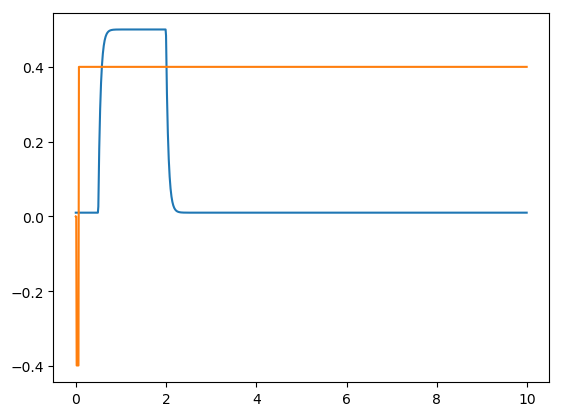

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0cd7405c18>

In [11]:
#parameters
centis = 10.0^-2
TAU = 0.05 
BETA = 1
L0 = 8*centis # optimal length of muscle
F0 = 30
V_MAX = 5*L0
L_ST = 4*L0 # length of slack tendon
MAX_STRAIN = 0.0325
K_SP = 20/centis
K_T = F0/(MAX_STRAIN*L_ST)
L_MT = 39.5*centis
V_MT = 0
L_LOAD = 5*centis
L_TOT = 44.5*centis

include("Musclesim.jl")
include("jules/jules.jl")
ms = MuscleSim
js = Jules

start = 0
fin = 10
dt = 0.01
time = collect(start:dt:fin)

ramp = t -> t/2+ 0.01;

(model, external_model) = ms.CreateModel(
    start_time = start,
    end_time = fin,
    dt = dt,
    tau = TAU,
    beta = BETA,
    V_max = V_MAX,
    F_max = F0,
    L_optimal = L0,
    L_mt_initial = L_MT,
    K_t = K_T,
    K_sp = K_SP,
    L_st = L_ST,
    L_total = L_TOT,
    L_load = L_LOAD,
    excitation_func=ms.excite)

output = ms.simulateExternal(model, external_model)
#plot(model.time, model.excitation)
#plot(model.time, model.activation)

index = 1:length(output.time)-1
plot(output.time[index], output.activation[index])
plot(output.time[index], output.V_m[index])
#plot(output.time[index], output.F_m[index])

#output.activation[index]
#Kplot(model.time, model.activation)
#plot(time, b[1:length(time)])



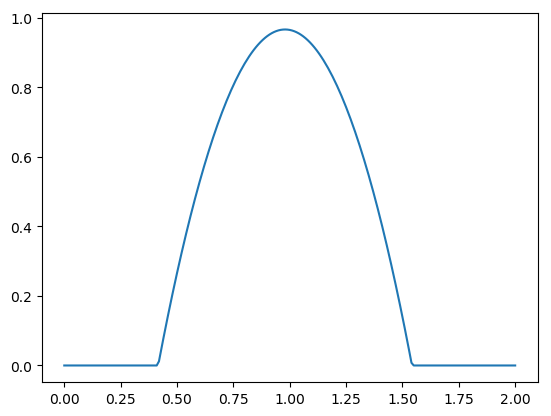

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7a7f248278>

In [12]:
#plot(model.time, model.K_t)
#add slack length of the load
#integrate until F_m settles for initial value
#let integrations go for a little while to allow errors to settle
#calculate a(t) every iteration

#=
array = collect(-0:0.01:2)
out = map(ms.norm_length_tension, array)
plot(array,  out)
=#

#js.interp(out, array, 0.0)
#plot(array,out)

$$
\begin{aligned}
F_m &= F_t                         \\
\dot{F}_m &= \dot{F}_t             \\
F_t &= K_t(L_t - L_{st})           \\
F_m &= A\cdot FV(V_m)\cdot LT(L_m) \\
L_T &= L_{mt} - L_m                \\
\tilde{F}_m &= \frac{F_m}{F_0}     \\
\tilde{L}_m &= \frac{L_m}{L_0}     \\
\tilde{V}_m &= \frac{V_m}{V_{max}} \\
\dot{a}(t) &= \frac{u(t)-a(t)}{\tau} \\
\dot{a}(t) &= \frac{u(t) - (\beta + (1 - \beta) u(t)) a(t)}{\tau} \\
\varepsilon &= \frac{L_t - L_{st}}{L_{st}} \\
LT\left(\frac{L}{L_0}\right) &= -3.0508\cdot \left(\frac{L}{L_0}\right)^2 + 5.9758\cdot \left(\frac{L}{L_0}\right) - 1.9597, 0.42 \le \frac{L}{L_0}\le1.54 \\
K_t &= \frac{F_0}{\varepsilon_{max}L_{st}} \\
\tilde{V}_m &= 0.995242\cdot e^{13.8817(F\tilde{V}-1.39214)} - 0.996815\cdot e^{-3.91442 F\tilde{V}} \\
\dot{F}_t &= K_t (V_{mt} - V_m) \\
V_m &= V_{max} \cdot FV^{-1} \left(\frac{F_m}{F_0 \cdot a \cdot LT(\tilde{L}_m)}\right)
\end{aligned}
$$

$L_{st}$ is the length of the slack tendon.
$a$ is muscle activation
$u$ is neural excitation
$\tau$ is time constant
$\varepsilon$ is tendon strain.

In [4]:
r = collect(5:3:38)
r[length(r)]

38

In [5]:
temp = collect(-2:0.001:1.5)

temp = map(x -> (x, ms.norm_inv_fv(x)), temp)

temp = filter(x -> x[2] < 1, temp)

3393-element Array{Tuple{Float64,Float64},1}:
 (-2.0, -0.9968)  
 (-1.999, -0.9968)
 (-1.998, -0.9968)
 (-1.997, -0.9968)
 (-1.996, -0.9968)
 (-1.995, -0.9968)
 (-1.994, -0.9968)
 (-1.993, -0.9968)
 (-1.992, -0.9968)
 (-1.991, -0.9968)
 (-1.99, -0.9968) 
 (-1.989, -0.9968)
 (-1.988, -0.9968)
 ⋮                
 (1.381, 0.848169)
 (1.382, 0.860106)
 (1.383, 0.872208)
 (1.384, 0.88448) 
 (1.385, 0.896923)
 (1.386, 0.909539)
 (1.387, 0.922332)
 (1.388, 0.935303)
 (1.389, 0.948455)
 (1.39, 0.96179)  
 (1.391, 0.975312)
 (1.392, 0.989022)

In [15]:
?constrain


search:

Couldn't find constrain
Perhaps you meant contains or const


No documentation found.

Binding `constrain` does not exist.
